# The Sparks Foundation

# Data Science and Business Analytics Internship- Grip July'21 


## Task1: Prediction Using Supervised ML 

### Author: Viren Vaghasiya

#### Step1:- Importing Libraries

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step2:- Reading Data

In [2]:
# load the data
url= "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df= pd.read_csv(url)

In [3]:
# read the data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Step 3:- Data Visualization

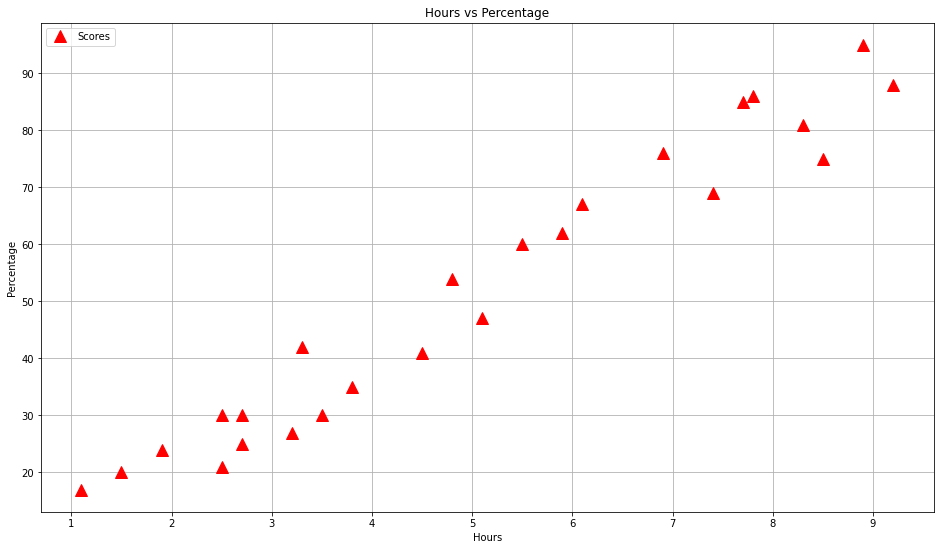

In [7]:
#plotting a scatter plot to understand the trend
plt.rcParams["figure.figsize"]=[16,9]
df.plot(x="Hours", y="Scores", style="^", color="red", markersize=12)
plt.title("Hours vs Percentage")
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.grid()
plt.show()

###### It is a clearly shows a linear relationship between the two attributes. Therefore we can use a linear regressive supervised machine learning model

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
X = df.iloc[:,:1].values
y = df.iloc[:,1:].values

In [11]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [13]:
X.shape

(25, 1)

In [14]:
y.shape

(25, 1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

#### Step 4:- Training the Model

In [17]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

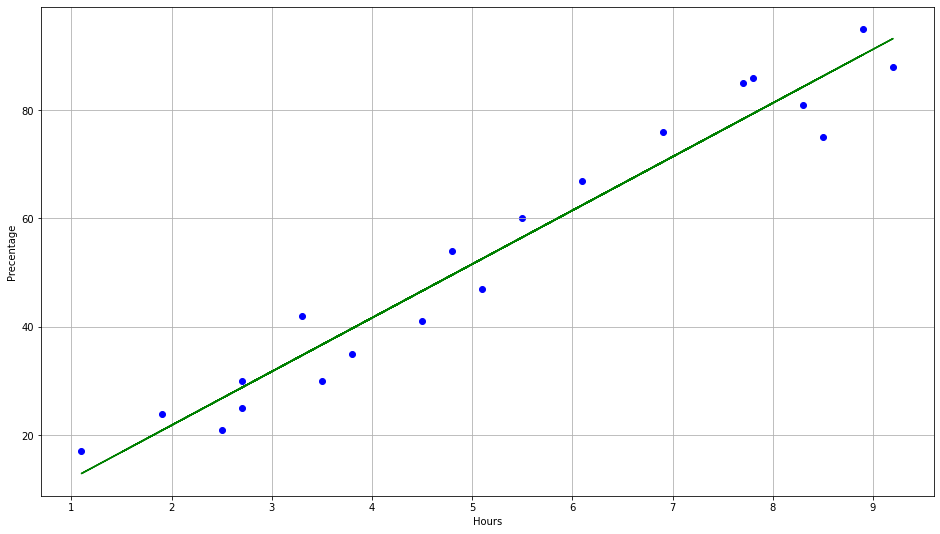

In [18]:
line= model.coef_*X + model.intercept_

#plotting for the training data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_train, y_train, color='blue')
plt.plot(X, line, color='green');
plt.xlabel("Hours")
plt.ylabel("Precentage")
plt.grid()
plt.show()

###### The green is the best fit line for the training data set

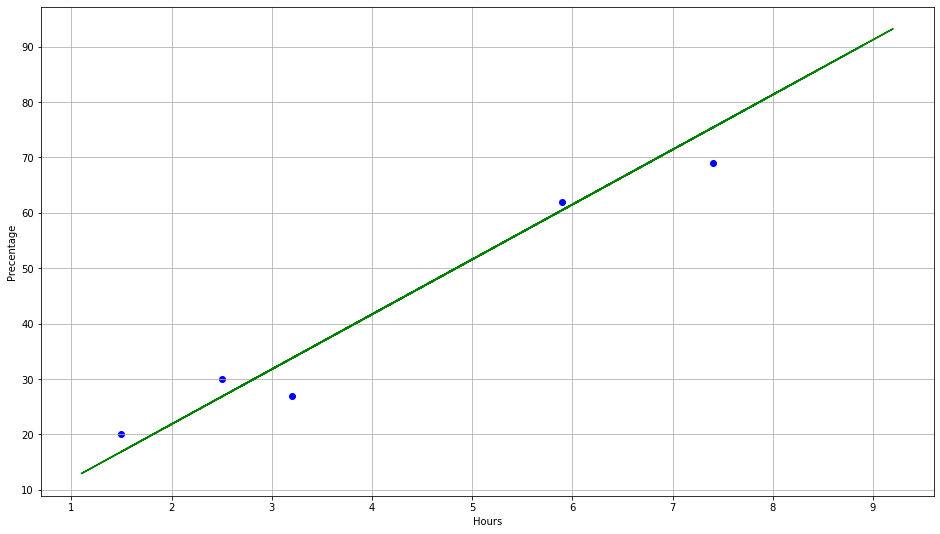

In [19]:
# plotting for test data 

plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_test, y_test, color='blue')
plt.plot(X, line, color='green');
plt.xlabel("Hours")
plt.ylabel("Precentage")
plt.grid()
plt.show()


###### The green line is the best fit line for test data.

In [20]:
# making prediction
y_pred= model.predict(X_test)

In [21]:
# evaluating the model
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("R2 Score:",r2_score(y_test, y_pred) )

Mean Absolute Error:  4.183859899002975
R2 Score: 0.9454906892105355


###### the r2 score is fairly good, so we will make the prediction for the given number of hours.

In [22]:
# making prediction for 9.25 hours
hours= 9.25
question_prediction= model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is", question_prediction[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]
